## Régularisation

Les méthodes de régularisations consistent à ajouter de l'information au problème afin par exemple d'orienter l'apprentissage du modèle.

Par exemple la régularisation L1 ou L2 consiste à changer la formule de la fonction de coût pour inciter l'entraînement à trouver des paramètre theta davantage proche de 0.

L'objet de ce notebook est d'étudier un peu l'impact de la régularisation L1 et L2 sur les paramètre du modèle

Charger le dataset houses.csv avec pandas 

In [1]:
import pandas as pd
df = pd.read_csv("houses.csv")
df

size  nb_rooms  garden orientation          price
0   104.636726         1       1         Est  256700.274182
1   151.518657         3       0        Nord  246227.911846
2    57.635452         1       1        Nord  213210.277485
3   183.609121         3       1         Sud  344820.832930
4   122.189127         1       0         Sud  236617.435611
5   131.333061         1       0         Sud  239839.486937
6   112.665317         2       1       Ouest  283996.624176
7   156.956677         2       1         Est  294804.435981
8   145.488679         1       1        Nord  254412.666584
9   178.216025         2       1        Nord  283486.636381
10   88.219137         3       1         Est  289099.300030
11   95.154524         3       0       Ouest  246468.043338
12  195.582074         2       1        Nord  287648.601169
13  126.964653         2       1       Ouest  289328.933561
14  143.686332         3       1         Sud  333855.567796
15  172.468382         3       1        Nord  302019.790686
16  148.339791         3       1         Sud  335280.088415
17  108.931822         2       1       Ouest  282493.716835
18  251.687944         2       0         Sud  288946.988724
19  233.928173         1       1        Nord  275667.591913
20  251.154598         1       0         Sud  268851.907267
21  160.645241         3       1         Sud  338843.182886
22   92.281464         2       0        Nord  204102.963877
23  232.667322         2       0         Sud  285425.428220
24  193.543826         2       0       Ouest  258179.585964
25   54.099859         2       0        Nord  180411.622286
26  173.254926         3       0        Nord  252223.369246
27  103.137664         3       1       Ouest  300057.117227
28  198.497109         2       1         Est  305310.988459
29  146.458657         2       1         Est  291709.653066
30   95.968171         2       1        Nord  255847.225659
31  200.529897         3       0        Nord  258767.198391
32  154.845074         2       1         Sud  317198.808027
33  217.069114         1       1        Nord  272316.542229
34  184.570011         2       0         Sud  275054.450259
35  125.705613         3       0         Sud  277883.987378
36  133.804426         1       1       Ouest  271672.126390
37  241.208034         1       1       Ouest  298040.865108
38  245.868145         1       0         Est  244898.446646
39  147.721609         2       1       Ouest  296093.427445

In [2]:
# Retrait des maisons avec les valeurs négatives
df = df[df["price"] >= 0]
df

size  nb_rooms  garden orientation          price
0   104.636726         1       1         Est  256700.274182
1   151.518657         3       0        Nord  246227.911846
2    57.635452         1       1        Nord  213210.277485
3   183.609121         3       1         Sud  344820.832930
4   122.189127         1       0         Sud  236617.435611
5   131.333061         1       0         Sud  239839.486937
6   112.665317         2       1       Ouest  283996.624176
7   156.956677         2       1         Est  294804.435981
8   145.488679         1       1        Nord  254412.666584
9   178.216025         2       1        Nord  283486.636381
10   88.219137         3       1         Est  289099.300030
11   95.154524         3       0       Ouest  246468.043338
12  195.582074         2       1        Nord  287648.601169
13  126.964653         2       1       Ouest  289328.933561
14  143.686332         3       1         Sud  333855.567796
15  172.468382         3       1        Nord  302019.790686
16  148.339791         3       1         Sud  335280.088415
17  108.931822         2       1       Ouest  282493.716835
18  251.687944         2       0         Sud  288946.988724
19  233.928173         1       1        Nord  275667.591913
20  251.154598         1       0         Sud  268851.907267
21  160.645241         3       1         Sud  338843.182886
22   92.281464         2       0        Nord  204102.963877
23  232.667322         2       0         Sud  285425.428220
24  193.543826         2       0       Ouest  258179.585964
25   54.099859         2       0        Nord  180411.622286
26  173.254926         3       0        Nord  252223.369246
27  103.137664         3       1       Ouest  300057.117227
28  198.497109         2       1         Est  305310.988459
29  146.458657         2       1         Est  291709.653066
30   95.968171         2       1        Nord  255847.225659
31  200.529897         3       0        Nord  258767.198391
32  154.845074         2       1         Sud  317198.808027
33  217.069114         1       1        Nord  272316.542229
34  184.570011         2       0         Sud  275054.450259
35  125.705613         3       0         Sud  277883.987378
36  133.804426         1       1       Ouest  271672.126390
37  241.208034         1       1       Ouest  298040.865108
38  245.868145         1       0         Est  244898.446646
39  147.721609         2       1       Ouest  296093.427445

Faire un train test split du dataset histoire de garder cette bonne habitude

In [3]:
#!pip3 install scikit-learn

In [4]:
df = pd.get_dummies(df, columns=['orientation'])
df

size  nb_rooms  garden          price  orientation_Est  \
0   104.636726         1       1  256700.274182                1   
1   151.518657         3       0  246227.911846                0   
2    57.635452         1       1  213210.277485                0   
3   183.609121         3       1  344820.832930                0   
4   122.189127         1       0  236617.435611                0   
5   131.333061         1       0  239839.486937                0   
6   112.665317         2       1  283996.624176                0   
7   156.956677         2       1  294804.435981                1   
8   145.488679         1       1  254412.666584                0   
9   178.216025         2       1  283486.636381                0   
10   88.219137         3       1  289099.300030                1   
11   95.154524         3       0  246468.043338                0   
12  195.582074         2       1  287648.601169                0   
13  126.964653         2       1  289328.933561                0   
14  143.686332         3       1  333855.567796                0   
15  172.468382         3       1  302019.790686                0   
16  148.339791         3       1  335280.088415                0   
17  108.931822         2       1  282493.716835                0   
18  251.687944         2       0  288946.988724                0   
19  233.928173         1       1  275667.591913                0   
20  251.154598         1       0  268851.907267                0   
21  160.645241         3       1  338843.182886                0   
22   92.281464         2       0  204102.963877                0   
23  232.667322         2       0  285425.428220                0   
24  193.543826         2       0  258179.585964                0   
25   54.099859         2       0  180411.622286                0   
26  173.254926         3       0  252223.369246                0   
27  103.137664         3       1  300057.117227                0   
28  198.497109         2       1  305310.988459                1   
29  146.458657         2       1  291709.653066                1   
30   95.968171         2       1  255847.225659                0   
31  200.529897         3       0  258767.198391                0   
32  154.845074         2       1  317198.808027                0   
33  217.069114         1       1  272316.542229                0   
34  184.570011         2       0  275054.450259                0   
35  125.705613         3       0  277883.987378                0   
36  133.804426         1       1  271672.126390                0   
37  241.208034         1       1  298040.865108                0   
38  245.868145         1       0  244898.446646                1   
39  147.721609         2       1  296093.427445                0   

    orientation_Nord  orientation_Ouest  orientation_Sud  
0                  0                  0                0  
1                  1                  0                0  
2                  1                  0                0  
3                  0                  0                1  
4                  0                  0                1  
5                  0                  0                1  
6                  0                  1                0  
7                  0                  0                0  
8                  1                  0                0  
9                  1                  0                0  
10                 0                  0                0  
11                 0                  1                0  
12                 1                  0                0  
13                 0                  1                0  
14                 0                  0                1  
15                 1                  0                0  
16                 0                  0                1  
17                 0                  1                0  
18                 0                  0                1  
19                 1                  0  

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

Faire un modèle qui prédit le prix de la maison en fonction des autres caractéristiques. 

Faites les éventuels traitement de donnée nécessaire.

In [6]:
X_train = train.drop(columns=['price'], axis=1)
y_train = train['price']
X_test = test.drop(columns=['price'], axis=1)
y_test = test['price']

Depuis le module sklearn.linear_model instancier une régression linéaire et entraîner le modèle sur les données. 

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Afficher les paramètres du modèle (ainsi que le biais) et calculer la norme du vecteur des paramètres

In [8]:
model.coef_, model.intercept_ #le biais est aussi l'intecept_

(array([   318.22741722,  21877.77190033,  52273.54727818,  -2873.26629404,
        -20663.30778966,   2174.72298183,  21361.85110187]),
 149255.8428342275)

In [9]:
# Norme du vecteur des paramètres
import numpy as np

def calc_param_norm(params):
  return np.linalg.norm(params)

print(calc_param_norm(model.coef_))

64090.15499754495


Créer un nouveau model RidgeRegression depuis le module linear_model


Choisir alpha = 0.3 à la création du modèle (consulter la documentation)

### Formule Ridge Regression

$ \sum(y-\hat{y})^2 + \alpha * \sum\theta^2 $

In [10]:
from sklearn.linear_model import Ridge
modelRidge1 = Ridge(alpha = 0.3)
modelRidge1.fit(X_train, y_train)
print("Les coefficients : ", modelRidge1.coef_)
print("Calcul de la norme : ", calc_param_norm(modelRidge1.coef_))

Les coefficients :  [   318.94211685  21641.54404877  49766.27849988  -2253.76380188
 -20025.08809997   2223.74688228  20055.10501957]
Calcul de la norme :  61305.59942488465


Entraîner le modèle à nouveau  avec alpha = 0.6 et afficher à nouveau les valeurs des paramètres et la norme. Comment cela a-t-il évoluer ? 

In [11]:
modelRidge2 = Ridge(alpha = 0.6)
modelRidge2.fit(X_train, y_train)
print("Les coefficients : ", modelRidge2.coef_)
print("Calcul de la norme : ", calc_param_norm(modelRidge2.coef_))

Les coefficients :  [   319.53918961  21398.01043967  47502.15677323  -1736.44193264
 -19423.00026864   2259.79839728  18899.64380399]
Calcul de la norme :  58796.28601292723


Afficher la MSE sur le train et le test du modèle originel et du model régularisé 

In [12]:
from sklearn.metrics import mean_squared_error
# MSE du train
pred_original_train = model.predict(X_train)
pred_reg_train = modelRidge2.predict(X_train)

# MSE du test
pred_original_test = model.predict(X_test)
pred_reg_test = modelRidge2.predict(X_test)

print("MSE sur le train du model original : ", mean_squared_error(y_train, pred_original_train))
print("MSE sur le test du model original : ", mean_squared_error(y_test, pred_original_test))
print("Différence original : ", mean_squared_error(y_train, pred_original_train) - mean_squared_error(y_test, pred_original_test))

print("MSE sur le train du model régularisé : ", mean_squared_error(y_train, pred_reg_train))
print("MSE sur le test du model régularisé : ", mean_squared_error(y_test, pred_reg_test))
print("Différence original : ", mean_squared_error(y_train, pred_reg_train) - mean_squared_error(y_test, pred_reg_test))

MSE sur le train du model original :  12133235.493544709
MSE sur le test du model original :  5015366.549727463
Différence original :  7117868.943817246
MSE sur le train du model régularisé :  18319714.92939835
MSE sur le test du model régularisé :  10752139.14499982
Différence original :  7567575.78439853


Faites une boucle for qui va entraînér une dizaine de modèle différents avec alpha valant successivement les valeurs suivantes : 

[2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0]


Vous afficherez sur un graphique l'évolution de la norme des paramètres en fonction de alpha

In [13]:
def compute_mse(model, X, y):
    y_pred = model.predict(X)
    return mean_squared_error(y_pred, y)

In [14]:
alphas = [2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0]
alphas=alphas[::-1]
norms = []
mse_trains = []
mse_tests = []

for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    norms.append(calc_param_norm(model.coef_))

    mse_train = compute_mse(model, X_train, y_train)
    mse_test  = compute_mse(model, X_test, y_test)
    
    mse_trains.append(mse_train)
    mse_tests.append(mse_test)
    

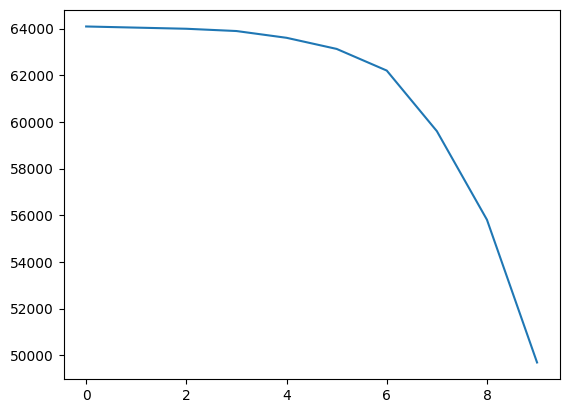

In [15]:
import matplotlib.pyplot as plt
plt.plot(norms)
plt.draw()

Afficher également la mse de train et la mse de test en fonction de alpha

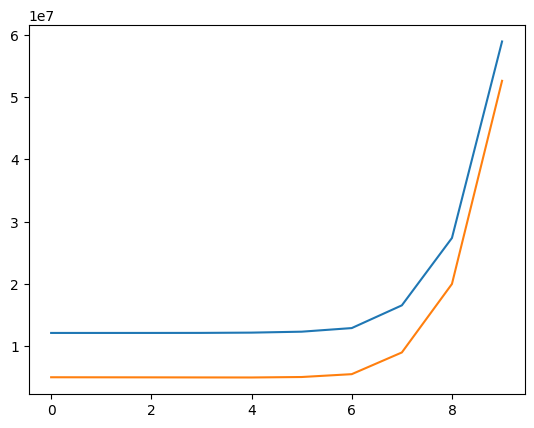

In [16]:
plt.plot(mse_trains)
plt.plot(mse_tests)
plt.draw()

Pouvez-vous expliquer l'évolution de la MSE quand on fait varier alpha ? 

Coder une fonction l2_mse(X, theta, y, lambda) qui retourne la MSE régularisée selon L2 


In [17]:
def y_pred(X, theta):
    one_col=np.ones((X.shape[0],1))
    X=np.concatenate((X,one_col),axis=1)
    return X @ theta

In [18]:
def l2_mse(X, theta, y, lambdaa):
    theta = np.array(theta)
    return 1/len(X) * np.sum((y - X@theta)**2) + lambdaa * (theta**2)


Calculer la loss theta = [0.5, 0.5, 0.5] et [0.4, 0.4, 0.4 ]

In [19]:
# Nous avons augmneter le nombre de coefficient car nous avons plus de colonnes après application du get_dummies
theta1 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
theta2 =  [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]

print("Loss pour theta1 : ", l2_mse(X_train, theta1, y_train,0.3))
print("Loss pour theta2 : ", l2_mse(X_train, theta2, y_train,0.3))


Loss pour theta1 :  [7.57766716e+10 7.57766716e+10 7.57766716e+10 7.57766716e+10
 7.57766716e+10 7.57766716e+10 7.57766716e+10]
Loss pour theta2 :  [7.57855653e+10 7.57855653e+10 7.57855653e+10 7.57855653e+10
 7.57855653e+10 7.57855653e+10 7.57855653e+10]


## Comme exemple, calculons le y_predict de façon numérique
On a un X avec 3 exemples composé de X1 et X2
On veut calculer Y predict. Pour cela on doit appliquer la formule du cours
Y_pred=theta0 + theta1*X1 + theta2 * X2
Pour que ce soit plus simple, on ne doit pas oublier que theta0=theta0 * X0 avec X0 vecteur de 3 lignes composé uniquement de 1

In [20]:
def sigmoid(x):
    return 1/(1 - np.exp(x))

def predict_reglog(X, thetas):
    return sigmoid(X @ thetas)

In [21]:
X=np.array([[1,0.2],[0.5,1.1],[2.1,1.1]])
one_col=np.ones((X.shape[0],1))
X=np.concatenate((X,one_col),axis=1)
thetas = np.array([0.1, 0.2, 1.1])

# test
print(predict_reglog(X, thetas))

[-0.40723022 -0.3406748  -0.27638229]


## Régularisation l1 


On va maintenant étudier la régularisation L1 

La régularisation L1 ne vas pas utiliser la norme L2 mais la norme L1 du vecteurs des paramètres. 

On va voir quelle peut avoir un effet plus drastique. 


Avant de reprendre l'étude précédente faire en sorte de créer une nouvelle colonne size_2 qui est size * (1.5 + np.random.randn) 


L'idée est d'avoir des colonne corélée et voir l'impact de la régularisation l1




In [22]:
df["size"].dtypes

dtype('float64')

In [23]:
df["size_2"] = df["size"].apply(lambda x : x * (1.5 + np.random.randn(1000)))
df

size  nb_rooms  garden          price  orientation_Est  \
0   104.636726         1       1  256700.274182                1   
1   151.518657         3       0  246227.911846                0   
2    57.635452         1       1  213210.277485                0   
3   183.609121         3       1  344820.832930                0   
4   122.189127         1       0  236617.435611                0   
5   131.333061         1       0  239839.486937                0   
6   112.665317         2       1  283996.624176                0   
7   156.956677         2       1  294804.435981                1   
8   145.488679         1       1  254412.666584                0   
9   178.216025         2       1  283486.636381                0   
10   88.219137         3       1  289099.300030                1   
11   95.154524         3       0  246468.043338                0   
12  195.582074         2       1  287648.601169                0   
13  126.964653         2       1  289328.933561                0   
14  143.686332         3       1  333855.567796                0   
15  172.468382         3       1  302019.790686                0   
16  148.339791         3       1  335280.088415                0   
17  108.931822         2       1  282493.716835                0   
18  251.687944         2       0  288946.988724                0   
19  233.928173         1       1  275667.591913                0   
20  251.154598         1       0  268851.907267                0   
21  160.645241         3       1  338843.182886                0   
22   92.281464         2       0  204102.963877                0   
23  232.667322         2       0  285425.428220                0   
24  193.543826         2       0  258179.585964                0   
25   54.099859         2       0  180411.622286                0   
26  173.254926         3       0  252223.369246                0   
27  103.137664         3       1  300057.117227                0   
28  198.497109         2       1  305310.988459                1   
29  146.458657         2       1  291709.653066                1   
30   95.968171         2       1  255847.225659                0   
31  200.529897         3       0  258767.198391                0   
32  154.845074         2       1  317198.808027                0   
33  217.069114         1       1  272316.542229                0   
34  184.570011         2       0  275054.450259                0   
35  125.705613         3       0  277883.987378                0   
36  133.804426         1       1  271672.126390                0   
37  241.208034         1       1  298040.865108                0   
38  245.868145         1       0  244898.446646                1   
39  147.721609         2       1  296093.427445                0   

    orientation_Nord  orientation_Ouest  orientation_Sud  \
0                  0                  0                0   
1                  1                  0                0   
2                  1                  0                0   
3                  0                  0                1   
4                  0                  0                1   
5                  0                  0                1   
6                  0                  1                0   
7                  0                  0                0   
8                  1                  0                0   
9                  1                  0                0   
10                 0                  0                0   
11                 0                  1                0   
12                 1                  0                0   
13                 0                  1                0   
14                 0                  0                1   
15                 1                  0                0   
16                 0                  0                1   
17                 0                  1                0   
18                 0                  0                1   
19                 1 

Reprendre l'étude faite sur la régularisation l2 et entraîner plusieurs régularisation L1 avec la même variation pour alpha. 

Mais cette fois ci vous utiliserez https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5911237d-bf07-4252-964e-d1881f596410' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>